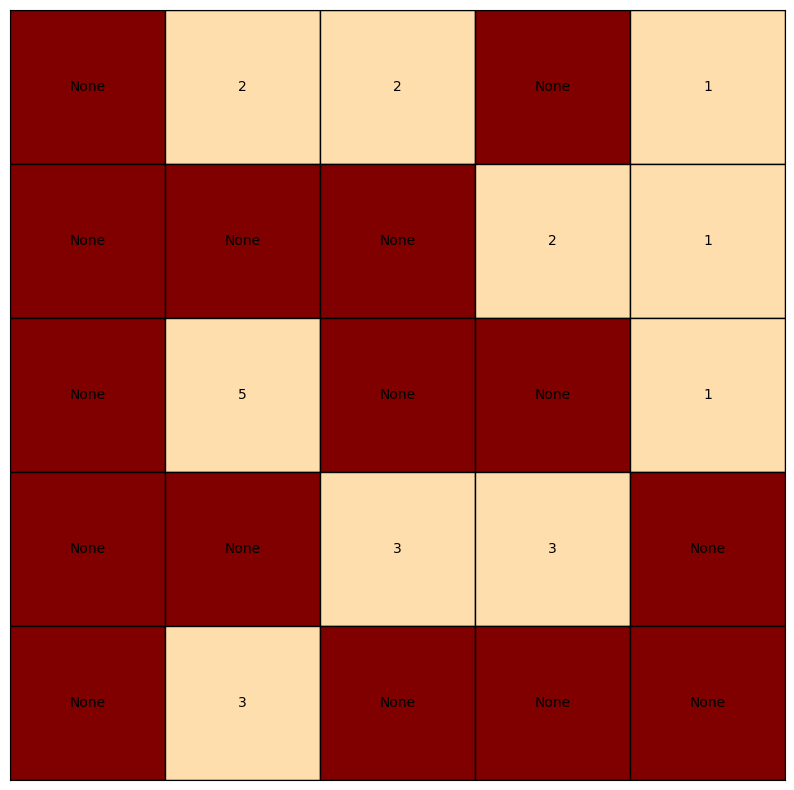

In [16]:
import matplotlib.pyplot as plt

class Cell:
  def __init__(self, value, pos_row, pos_col, revealed):
    self.value = value
    self.is_trap = 0       # 0: Trap, 1: Gem
    self.row = pos_row
    self.col = pos_col
    self.revealed = revealed     # flag 
    self.traps = 0                # to count the traps surrounding the cell
    
  def countTrap(self, size, matrix):
    if (self.row - 1 < 0): top = self.row
    else: top = self.row - 1

    if (self.row + 1 >= size): bottom = self.row
    else: bottom = self.row + 1

    if (self.col - 1 < 0): left = self.col
    else: left = self.col - 1

    if (self.col + 1 >= size): right = self.col
    else: right = self.col + 1

    for i in range(top, bottom + 1):
      for j in range(left, right + 1):
        if (matrix[i][j].is_trap == 1): 
          self.traps = self.traps + 1
    

class Map(Cell):
  def readFile(self, filename):
    with open(filename, 'r') as file:
      lines = file.readlines()
      row_index = 0
      col_index = 0
      for line in lines:
        row = line.strip().split(',')
        row_values = []
        for value in row:
          if (value.strip() == '_'):
            val = Cell(None, row_index, col_index, 0)
            row_values.append(val)
          else:
            val = Cell(value.strip(), row_index, col_index, 0)
            row_values.append(val)
          col_index = col_index + 1
        row_index = row_index + 1
        col_index = 0
        self.map_array.append(row_values)

      self.size = len(self.map_array)


  def __init__(self, filename):
    self.size = 0
    self.map_array = []
    self.readFile(filename)
  
  def printMap(self):
    # Tạo figure và axes
    fig, ax = plt.subplots()

    fig.set_size_inches(10, 10)

    # Vẽ các ô vuông
    for i in range(0, self.size):
        for j in range(0, self.size):
            if (self.map_array[i][j].value == None):
              color = "maroon"
            elif (self.map_array[i][j].value == "T"):
              color = "rosybrown"
            elif (self.map_array[i][j].value == "G"):
              color = "gold"

            else:
              color = "navajowhite"
            rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor="black")
            ax.add_patch(rect)
            # Ghi giá trị vào ô vuông
            ax.text(j + 0.5, i + 0.5, (self.map_array[i][j].value if self.map_array[i][j].value != None else "None"), ha="center", va="center", fontsize=10)

    # Loại bỏ các trục số
    ax.set_xticks([])
    ax.set_yticks([])

    # Cài đặt giới hạn trục
    ax.set_xlim(0, self.size)
    ax.set_ylim(self.size, 0)

    # Hiển thị ma trận
    plt.show()

file_path = "Map/5x5/5x5.txt"
map = Map(file_path)
#map.readFile(file_path)

map.printMap()
#print(map.map_array[0][0].UnrevealedTiles)


